### Exploratory Data Analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

logins=pd.read_json('logins.json') #read in json file
logins=logins.apply(pd.to_datetime).set_index(logins['login_time'])  #pd.to_datetime on dataframe and then set index to login_time for resampling


The index of the dataframe was set to the login_time feature beacause the resample method on dataframes can only be used if the index is in datetime format.  All of the rows of the dataframe were in datetime format, none of the rows contained samples with data quality issues.

In [2]:
logins.head(5)

,login_time
login_time,
1970-01-01 20:13:18,1970-01-01 20:13:18
1970-01-01 20:16:10,1970-01-01 20:16:10
1970-01-01 20:16:37,1970-01-01 20:16:37
1970-01-01 20:16:36,1970-01-01 20:16:36
1970-01-01 20:26:21,1970-01-01 20:26:21


The login times range from the dates of 1970-01-01 to 1970-04-13.  The login times were aggregated based on 15 minute intervals below.  15 minutes appears to be too small of a time interval to generalize an underlying pattern of demand.  At first glance, there appears to be a pattern of rising login count ever week and then a subsequent fall but larger intervals need to be explored.  

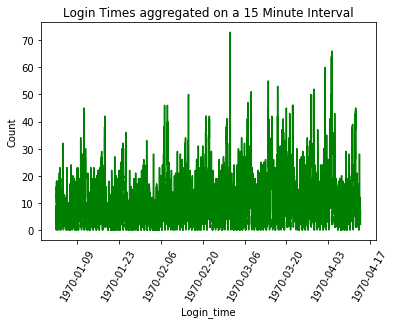

In [3]:

min_15=logins.resample('15min').count()
daily=logins.resample('D').count()
weekly=logins.resample('W').count()
monthly=logins.resample('M').count()

fig, ax1 = plt.subplots()

ax1.plot(min_15.index, min_15['login_time'], 'g-')
ax1.set_title('Login Times aggregated on a 15 Minute Interval')
ax1.set_xlabel('Login_time')
ax1.set_ylabel('Count')
plt.xticks(rotation=60)


plt.show()


The daily interval graph of user logins illustrates that user logins would increase and then fall for the duration of a week and then repeat.  Overall, the trend for user logins appears to be increasing in the daily login graph and is confirmed in the weekly login graph as the weekly login is steadily increasing until the third week of april and then login count starts to decline. The monthly login graph shows the login count increasing from January to Febuary to March but then decreases in April because the data only contains login times for half of the month.  Based on these time series charts, it appears that an event occured in the third week of March where login counts hit a weekly high but then started to decline.

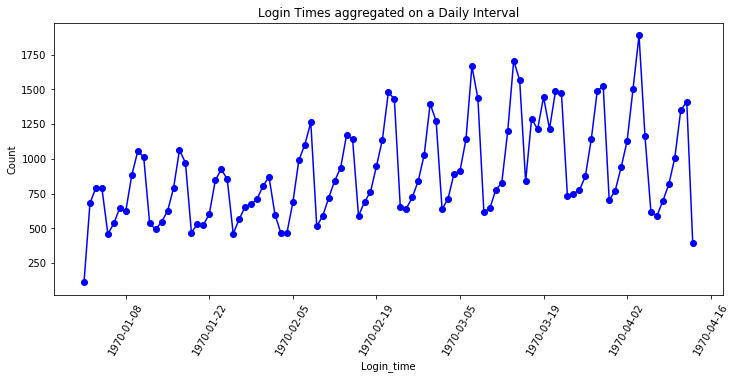

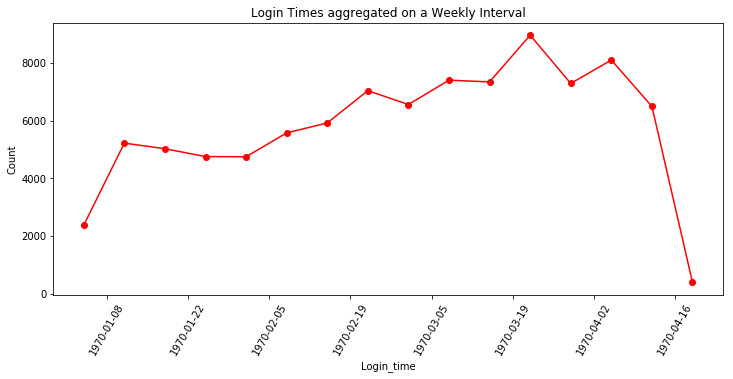

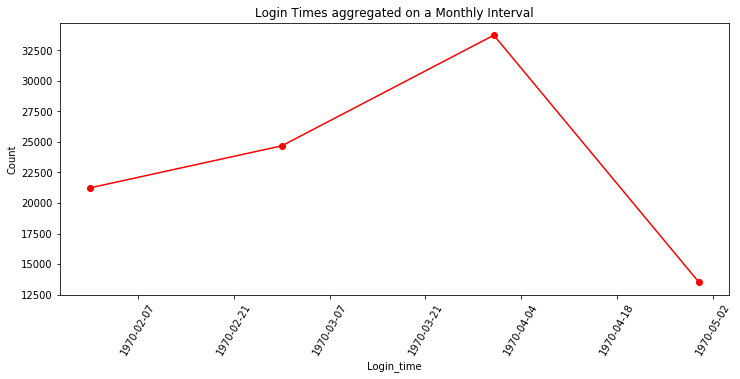

In [4]:
plt.rcParams['figure.figsize'] = 12,5

fig, ax2=plt.subplots()

ax2.plot(daily.index, daily['login_time'], 'b-', marker='o')
ax2.set_title('Login Times aggregated on a Daily Interval')
ax2.set_xlabel('Login_time')
ax2.set_ylabel('Count')
plt.xticks(rotation=60)


plt.show()
plt.rcParams['figure.figsize'] = 12,5

fig, ax3=plt.subplots()

ax3.plot(weekly.index, weekly['login_time'], 'r-', marker='o')
ax3.set_title('Login Times aggregated on a Weekly Interval')
ax3.set_xlabel('Login_time')
ax3.set_ylabel('Count')
plt.xticks(rotation=60)


plt.show()
plt.rcParams['figure.figsize'] = 12,5

fig, ax4=plt.subplots()

ax4.plot(monthly.index, monthly['login_time'], 'r-', marker='o')
ax4.set_title('Login Times aggregated on a Monthly Interval')
ax4.set_xlabel('Login_time')
ax4.set_ylabel('Count')
plt.xticks(rotation=60)


plt.show()
plt.rcParams['figure.figsize'] = 12,5

### Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

The key metric for success in this experiment is if there is a greater driver revenue from Ultimate Gotham and Ultimate Metropolis after the cost of the toll bridge is reimbursed compared to when the toll bridge cost was not reimbursed.  This metric would be chosen because if the revenue is greater after the change, this means reimbursing the toll bridge cost is profitable for Ultimate.   

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on: <br>
a. how you will implement the experiment <br>
b. what statistical test(s) you will conduct to verify the significance of the observation <br>
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.<br>

Two samples of Ultimate drivers will be created.  


The first sample contains 100 drivers that have to pay the toll fee and the second contains 100 drivers that do not have to pay the toll fee. 


Null Hypothesis: There is no difference between the mean of revenue for drivers in sample 1 vs. revenue for drivers in sample 2.

Alternative Hypothesis: There is a significant difference between the revenue for drivers in sample 1 vs. revenue for drivers in sample 2.


As many drivers will be used in the first sample until the mean of the first sample is the same as the population mean and the data is normally distributed.  The same sample size will be used in sample 2, drivers that do no pay toll fee, as in sample 1.  The mean rider revenue for the drivers in sample 1 will be found and compared to the mean rider revenue in sample 2 with a 2-sample t-test.  If the mean revenue for sample 2 is larger than the mean revenue for sample 1 and the associated p-value for the difference in means is less than 0.05, this means there is a significant difference between the means of the two samples.

If the p-value for the difference of means is less than 0.05 and the mean for sample 2 is greater, this means drivers should be given a toll reimbursment.  City officials should be notified that ridership across the toll bridge will be higher during weekday nights for Gotham resident and higher during weekday mornings for Metropolis residents.  More staff could be used to operate and moniter the toll bridge. If the p-value for the difference of means is less than 0.05 and the mean for sample 2 is less, this means drivers should not get a toll reimbursment. 

### Predictive Modeling

The user dataset contains users who signed up for an Ultimate account in January 2014.  The goal is to predict rider retention.  A rider is considered retained if they took a trip in the past 30 days. 

In [38]:
import json

with open('ultimate_data_challenge.json') as f:
    data = json.load(f)

# put data info pandas dataframe
df_rider = pd.DataFrame(data)
df_rider.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


Categorical columns with city and phone information were dummy encoded.  Any columns with datetime information were converted to datetime objects.

In [39]:
categorical=['city', 'phone']
df_rider = pd.get_dummies(df_rider, columns=categorical)
date_column=['last_trip_date', 'signup_date']
for col in date_column:
    df_rider[col] = pd.to_datetime(df_rider[col])
    


The missing values in the dataset appear to be concentrated in the average rating for and by the driver because there could have been zero ratings given.  These null values will be removed.

In [40]:
df_rider.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
city_Astapor              50000 non-null uint8
city_King's Landing       50000 non-null uint8
city_Winterfell           50000 non-null uint8
phone_Android             50000 non-null uint8
phone_iPhone              50000 non-null uint8
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), uint8(5)
memory usage: 3.7 MB


In [41]:
df_rider=df_rider.dropna()
df_rider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 15 columns):
avg_dist                  41744 non-null float64
avg_rating_by_driver      41744 non-null float64
avg_rating_of_driver      41744 non-null float64
avg_surge                 41744 non-null float64
last_trip_date            41744 non-null datetime64[ns]
signup_date               41744 non-null datetime64[ns]
surge_pct                 41744 non-null float64
trips_in_first_30_days    41744 non-null int64
ultimate_black_user       41744 non-null bool
weekday_pct               41744 non-null float64
city_Astapor              41744 non-null uint8
city_King's Landing       41744 non-null uint8
city_Winterfell           41744 non-null uint8
phone_Android             41744 non-null uint8
phone_iPhone              41744 non-null uint8
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), uint8(5)
memory usage: 3.4 MB


There do not appear to be any outliers for the predictive features. 

In [42]:
df_rider.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
count,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000
mean,5.465312,4.776648,4.601801,1.073697,8.884695,2.611393,61.304437,0.325795,0.211503,0.462701,0.289694,0.703143
std,5.149810,0.404109,0.616079,0.198681,18.309042,4.060121,34.799944,0.468677,0.408379,0.498613,0.453626,0.456878
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.790000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


A new column was defined as retention and will be predicted.  If the last trip date was in the previous 30 days the retention column is labeled with a 1 and 0 otherwise. The fraction of riders that were retained was 40.10%. 

In [43]:
import numpy as np
        
        
df_rider['retention'] = np.where(((df_rider['last_trip_date'] > '2014-06-01')), 1, 0)


In [44]:
sum(df_rider.retention)/len(df_rider)

0.4007282483710234

Unecessary columns for the prediction task will be removed.  The last trip date feature will be removed because the retention label was created using this feature and would give the predictive model too much information if it was included.  The rest of the features will be kept.


In [45]:
df_rider=df_rider.drop('last_trip_date', axis=1)

In [46]:
df_rider.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,retention
0,3.67,5.0,4.7,1.10,2014-01-25,15.4,4,True,46.2,0,1,0,0,1,1
1,8.26,5.0,5.0,1.00,2014-01-29,0.0,0,False,50.0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-06,0.0,3,False,100.0,1,0,0,0,1,0
3,2.36,4.9,4.6,1.14,2014-01-10,20.0,9,True,80.0,0,1,0,0,1,1
4,3.13,4.9,4.4,1.19,2014-01-27,11.8,14,False,82.4,0,0,1,1,0,0


The logistic regression fit was found for probability of retention vs average trip distance.  It appears that as average trip distance increases, probability of retention goes down.  This feature will be used in the predictive model.  

Text(0.5,1,'Probability of Retention vs. Average Trip Distance')

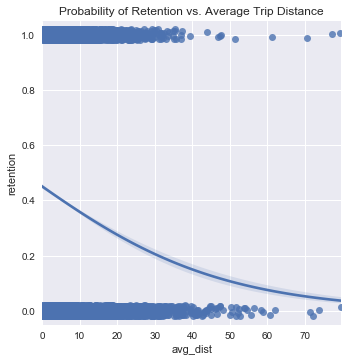

In [15]:
import seaborn as sns

sns.set(style="darkgrid")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="avg_dist", y="retention", data=df_rider,
               y_jitter=.02, logistic=True)
g.set(xlim=(0, max(df_rider['avg_dist'])), ylim=(-.05, 1.05))
plt.title('Probability of Retention vs. Average Trip Distance')

The logistic regression was found for probability of retention vs average rating by driver. It appears that as average rating by driver increases, probability of retention goes down. This feature will be used in the predictive model.

Text(0.5,1,'Probability of Retention vs. Average Rating by Driver')

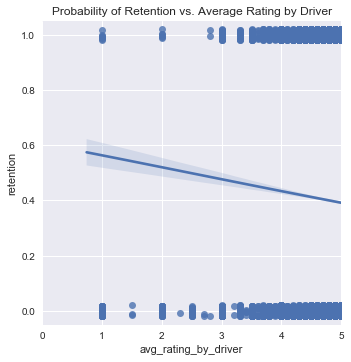

In [16]:
g = sns.lmplot(x="avg_rating_by_driver", y="retention", data=df_rider,
               y_jitter=.02, logistic=True)
g.set(xlim=(0, 5), ylim=(-.05, 1.05))
plt.title('Probability of Retention vs. Average Rating by Driver')

The logistic regression was found for probability of retention vs average rating of driver. It appears that as average rating of driver increases, probability of retention goes down. This feature will be used in the predictive model.

Text(0.5,1,'Probability of Retention vs. Average Rating of Driver')

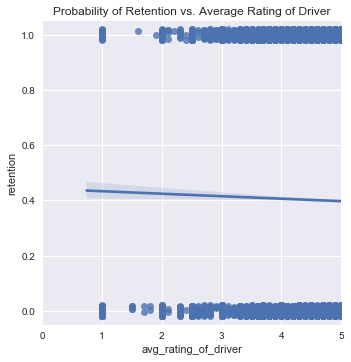

In [17]:
g = sns.lmplot(x="avg_rating_of_driver", y="retention", data=df_rider,
               y_jitter=.02, logistic=True)
g.set(xlim=(0, 5), ylim=(-.05, 1.05))
plt.title('Probability of Retention vs. Average Rating of Driver')

The logistic regression was found for probability of retention vs average surge multiplier. It appears that as average surge multiplier increases, probability of retention goes down. This feature will be used in the predictive model.

Text(0.5,1,'Probability of Retention vs. Average Surge')

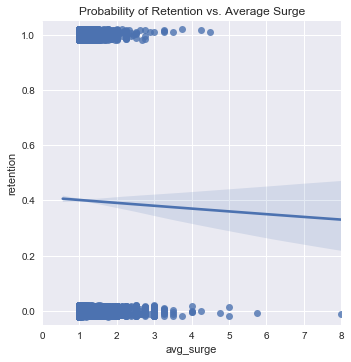

In [18]:
g = sns.lmplot(x="avg_surge", y="retention", data=df_rider,
               y_jitter=.02, logistic=True)
g.set(xlim=(0, max(df_rider.avg_surge)), ylim=(-.05, 1.05))
plt.title('Probability of Retention vs. Average Surge')

The logistic regression was found for probability of retention vs signup date. It appears that as signup date increases, probability of retention slightly goes down. This feature will be used in the predictive model.

Text(0.5,1,'Probability of Retention vs. Signup Date')

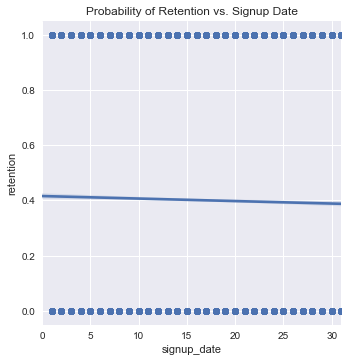

In [47]:
df_rider['signup_date']=df_rider.signup_date.dt.day

g = sns.lmplot(x='signup_date', y='retention', data=df_rider, logistic=True)
g.set(xlim=(0, max(df_rider.signup_date)), ylim=(-.05, 1.05))
plt.title('Probability of Retention vs. Signup Date')

The logistic regression was found for probability of retention vs percent of riders that are surged. It appears that as percent of riders that are surged goes up, probability of retention goes down. This feature will be used in the predictive model.

Text(0.5,1,'Probability of Retention vs. Percent of Rides that are Surged')

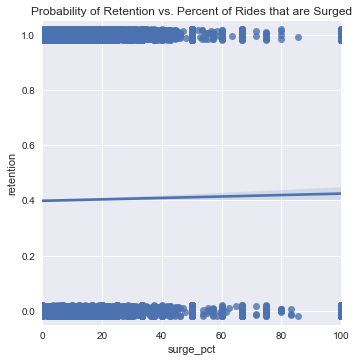

In [20]:
g = sns.lmplot(x="surge_pct", y="retention", data=df_rider,
               y_jitter=.02, logistic=True)
g.set(xlim=(0, max(df_rider['surge_pct'])), ylim=(-.05, 1.05))
plt.title('Probability of Retention vs. Percent of Rides that are Surged')

The logistic regression was found for probability of retention vs number of trips in the first 30 days of signing up. It appears that as the number of trips increases, probability of retention goes down. This feature will be used in the predictive model.

Text(0.5,1,'Probability of Retention vs. Number of Trips in First 30 Days')

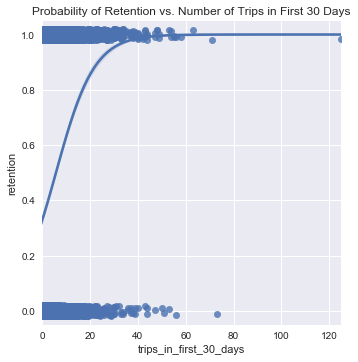

In [79]:
g = sns.lmplot(x="trips_in_first_30_days", y="retention", data=df_rider,
               y_jitter=.02, logistic=True)
g.set(xlim=(0, max(df_rider['trips_in_first_30_days'])), ylim=(-.05, 1.05))
plt.title('Probability of Retention vs. Number of Trips in First 30 Days')

The logistic regression was found for probability of retention vs percent of rides on weekdays. It appears that as percent of rides on weekdays goes up, probability of retention goes up. This feature will be used in the predictive model.

Text(0.5,1,'Probability of Retention vs. Percent of Rides on Weekdays')

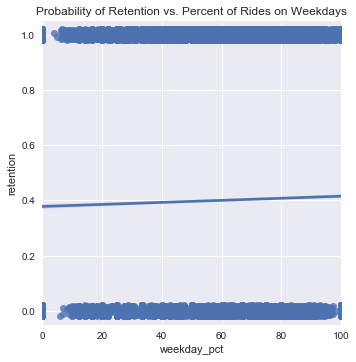

In [22]:
g = sns.lmplot(x="weekday_pct", y="retention", data=df_rider,
               y_jitter=.02, logistic=True)
g.set(xlim=(0, max(df_rider['weekday_pct'])), ylim=(-.05, 1.05))
plt.title('Probability of Retention vs. Percent of Rides on Weekdays')

Ultimate Black users appear to have a 20% higher retention rate than non-users. This feature will be used in the prediction model.  

Text(0.5,1,'Retention Rate for Ultimate Black Users and Non-users')

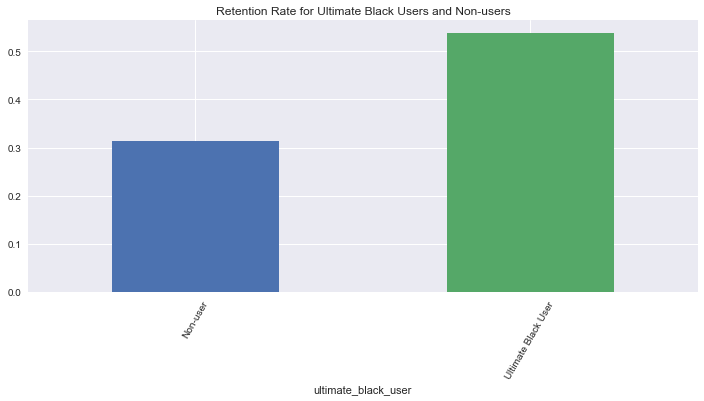

In [78]:
black_user=df_rider.groupby('ultimate_black_user').mean()['retention']
ax, fig=plt.subplots()

black_user.plot(kind='bar')
plt.xticks((0, 1), ('Non-user', 'Ultimate Black User'), rotation=60)
plt.title('Retention Rate for Ultimate Black Users and Non-users')

King's Landing users appear to have a 20% higher retention rate than Winterfell users and 30% higher retention rate than Astapor users. This feature will be used in the prediction model.

Text(0.5,1,'Retention Rate by City of User Signup')

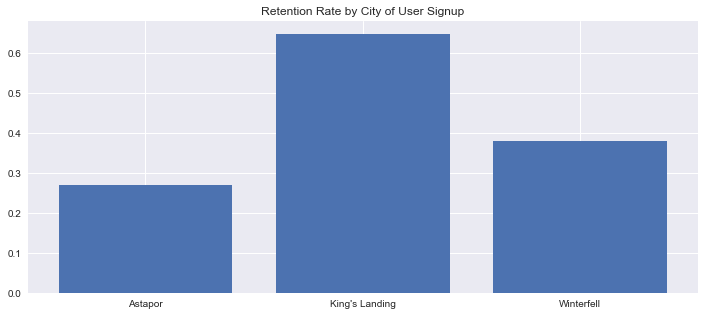

In [74]:
cities=['city_Astapor', 'city_King\'s Landing', 'city_Winterfell']
retention_by_city=[]
for city in cities:
    retention=(df_rider.groupby(city).mean()['retention'].iloc[1])
    retention_by_city.append(retention)

plt.bar(['Astapor', 'King\'s Landing', 'Winterfell'], retention_by_city)
plt.title('Retention Rate by City of User Signup')

iPhone users appear to have more than a 30% higher retention rate than non-users. This feature will be used in the prediction model.

Text(0.5,1,'Retention Rate by Type of Phone')

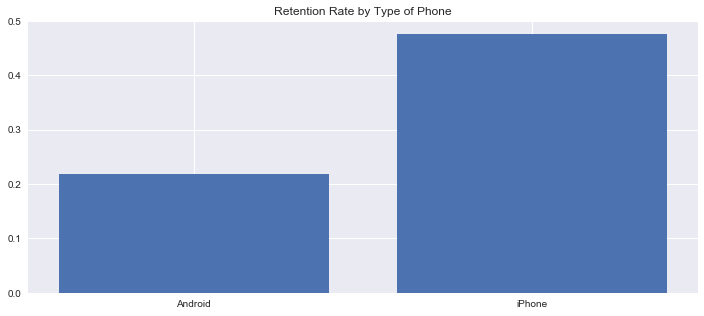

In [76]:
phones=['phone_Android', 'phone_iPhone']
retention_by_phone=[]
for phone in phones:
    retention=(df_rider.groupby(phone).mean()['retention'].iloc[1])
    retention_by_phone.append(retention)

plt.bar(['Android', 'iPhone'], retention_by_phone)
plt.title('Retention Rate by Type of Phone')

### Prediction Task

The feature being predicted is separated from predictors.  The rider retention status was predicted using a logistic regression, gradient boosting tree method, and a random forest. All of the features in the predictive features dataFrame were used in the model to predict retention. A train test split of 0.8/0.2 was used and 5 folds were used in cross validation.

In [87]:
y=df_rider['retention']
X=df_rider.drop('retention', axis=1)

In [192]:
%%time

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


output_values=[]
output_proba=[]

names=['Logreg', 'grad', 'RandomForestClassifier']

for name in names:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    if name == 'Logreg': 
        steps=[('scalar', StandardScaler()), (name, LogisticRegression())]
        parameters_grid= {'Logreg__C': [1.0, 0.5, 0.1, 0.05, 0.025, 0.01]}   
    elif name == 'grad':
        steps=[(name, GradientBoostingClassifier())]
        parameters_grid={'grad__n_estimators': np.arange(10, 110, 30),
                      'grad__max_depth' : np.array([10])}
    elif name == 'RandomForestClassifier':
        steps=[(name, RandomForestClassifier())]
        parameters_grid={'RandomForestClassifier__n_estimators': np.arange(10, 110, 30),
                      'RandomForestClassifier__max_depth' : np.array([10])}
    
    pipeline=Pipeline(steps) 


    print('Fitting a ' + name  + ' to labeled training data...')


    clf = GridSearchCV(pipeline, parameters_grid, cv=5)  #Gridsearch object

    clf.fit(X_train, y_train)  #fit 
    
    if name == 'Logreg':
        print(name)
        print('Best Parameters: ', clf.best_estimator_.steps[-1][1])
        print('Logreg Coefficients: ', sorted(list(zip(X.columns, clf.best_estimator_.steps[-1][1].coef_[0])), key=lambda x: x[1], reverse=True))
    else:
        print(name)
        print('Best Parameters: ', clf.best_estimator_.steps[-1][1])
        print(name, ' Feature Importances: ', sorted(list(zip(X.columns, clf.best_estimator_.steps[-1][1].feature_importances_)), key=lambda x: x[1], reverse=True)[0:5])
        
    output_values.append(clf.predict(X_test))  #predict
    output_proba.append(clf.predict_proba(X_test)[:,1])

Fitting a Logreg to labeled training data...
Logreg
Best Parameters:  LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Logreg Coefficients:  [('ultimate_black_user', 0.4472547238337542), ("city_King's Landing", 0.4413926467202071), ('trips_in_first_30_days', 0.42702485827085124), ('phone_iPhone', 0.20133091020697147), ('surge_pct', 0.06744235839844955), ('weekday_pct', 0.037910248709184836), ('avg_rating_of_driver', -0.029093078345711815), ('avg_surge', -0.03131334808746708), ('signup_date', -0.053958588332327695), ('city_Winterfell', -0.05953196627990605), ('avg_rating_by_driver', -0.09624217260134471), ('avg_dist', -0.18856857015088238), ('city_Astapor', -0.3206740215446492), ('phone_Android', -0.3243774796099927)]
Fitting a grad to labeled training data...
grad
Best Para

#### Metrics

Three models were tested and the metrics of Accuracy and AUC of the ROC curve were used to evaluate which model was the best.  Logistic Regression was used because the signs of the coefficents in the model will tell us how to change the feature in the future to improve rider retention.  Ensemble based methods were tried because many subsets of features could be fitted consecutively so that interactions between multiple features would be found.  

In order to save model fitting time for the ensemble methods, the max tree depth was 10 and more options for the depth were not searched.  In the future, more estimators can be searched as well as a larger tree depth.  The best number of estimators for both the gradient boosted model and the random forest was 100 estimators and could be more if more options were checked.  In addition, less features can be used in a future iteration, the features that had the smallest coefficent in the logistic regression model to prevent overfitting.  

The best model was the random forest model because it had the highest accuracy and ROC-AUC of 77.17% and 84.78%.  The accuracy for the random forest model is low and can be improved by using more hyperparameters when searching over the space of hyperparameters. 


In [193]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

data=list(zip(output_values, output_proba))
models=['Logistic Regression', 'Gradient Boosting Classifier', 'Random Forest Classifier']
i=0
for value in data:
    print(models[i])
    print('Accuracy: ' + str(round(accuracy_score(y_test, value[0]) * 100, 4))+ '%')
    print("AUC of ROC Curve: " + "{}".format(roc_auc_score(y_test, value[1])))
    i=i+1
    print()
    

Logistic Regression
Accuracy: 52.9884%
AUC of ROC Curve: 0.49802464606113794

Gradient Boosting Classifier
Accuracy: 52.4135%
AUC of ROC Curve: 0.49970442122054914

Random Forest Classifier
Accuracy: 77.3266%
AUC of ROC Curve: 0.8463512448418575



#### Feature Importance 

The best performing model will contain the most important features to look at when understanding rider retention.  The top features in the random forest model were:

1.) Average rating by driver <br>
2.) Surge Percentage <br>
3.) King's City Landing <br>
4.) Weekday Percentage <br>
5.) Average Surge <br>

### Recommendations

Although the logistic regression model performed considerably worse compared to the random forest model, the model gives us signs (positive or negative) for the features. The sign of the feature tells us how to change the feature in order to improve rider retention.  

Changes for the top Top Features

1.) Average rating by driver: The coefficient in the logistic regression model for this feature was negative.  In the future, drivers should be told that lower rated riders have a higher probability of retention and therefore should be given preferential treatment in pickups. <br>


2.) Surge Percentage: The coefficient in the logistic regression model for this featue was positive.  In the future, drivers should be told giving rides in surge times leads to a higher retention rate.  In addition, a discount can be applied during surge times that offsets the revenue increase from the higher retention rate.  The discount would lead to a lower surge percentage as well as a higher retention rate. <br>

3.) King's Landing: The coefficient in the logistic regression model for this feature was positive as well as the second largest cofficient.  In the future, more drivers should be available in King's Landing because users who signed up in this area have the highest retention rates. <br>

4.) Weekday Percentage: The coefficient in the logistic regression model for this feature was positive, meaning that a higher percentage of rides on weekdays led to a higher retention rate.  Ultimate should signup drivers that available to work on weekdays in the future so that rentention is increased.

5.) Average Surge: The coefficient in the logistic regression model for this feature was negative and therefore means a higher surge multiple on rates caused rider retention to go down. In the future, average surge rates should be decreased by the increase in revenue from higher rider retention so that retention is increased.  